## Importing Necessary Libraries 

In [1]:
## importing data handeling libraries 

import pandas as pd 
import numpy as np 
from collections import OrderedDict 
from sklearn.preprocessing import LabelEncoder,StandardScaler 

## data visualisation libraries 

import matplotlib.pyplot as plt 
import seaborn as sns 


## preprocessing libraries 

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## warnings filtering library

import warnings 
warnings.filterwarnings ("ignore") 

## model bulding libraries 

from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,learning_curve

## model evaluation libraries

from sklearn.metrics import r2_score, mean_squared_error 

## machien learning model libraries 

from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

import xgboost
from xgboost import XGBRegressor 

## importing clustering 
from sklearn.cluster import KMeans 

## Creating DataFrame 

In [2]:
## importing datset

df1 = pd.read_excel("Medibuddy Insurance Data Price (1) (1).csv.xlsx") 
df1.head() 

,Policy no.,age,sex,bmi,charges in INR
0,PLC156898,19.0,female,27.900,16884.92400
1,PLC156907,18.0,male,33.770,1725.55230
2,PLC156916,28.0,male,33.000,4449.46200
3,PLC156925,33.0,male,22.705,21984.47061
4,PLC156934,32.0,male,28.880,3866.85520


In [3]:
## importing datset

df2 = pd.read_excel("Medibuddy insurance data personal details copy.xlsx") 
df2.head() 

,Policy no.,children,smoker,region
0,PLC157006,0.0,no,southwest
1,PLC157033,1.0,no,southwest
2,PLC157060,0.0,no,southwest
3,PLC157087,1.0,no,southwest
4,PLC157186,5.0,no,southwest


In [4]:
## creating dataframe

df = pd.merge(df1,df2,on="Policy no.",how="inner")
le = LabelEncoder()
df["sex"] = le.fit_transform(df["sex"])
df["smoker"] = le.fit_transform(df["smoker"])
df["region"] = le.fit_transform(df["region"])
df.head()

,Policy no.,age,sex,bmi,charges in INR,children,smoker,region
0,PLC156898,19.0,0,27.900,16884.92400,0.0,1,3
1,PLC156907,18.0,1,33.770,1725.55230,1.0,0,2
2,PLC156916,28.0,1,33.000,4449.46200,3.0,0,2
3,PLC156925,33.0,1,22.705,21984.47061,0.0,0,1
4,PLC156934,32.0,1,28.880,3866.85520,0.0,0,1


In [5]:
np.mean(df["charges in INR"])

13270.422265141257

# 2. Average amount of money company spent over each policy cover is 13270 Rs.

## EDA 

In [6]:
## Doing Exploratory data analysis 
df.shape 

(1338, 8)

In [7]:
df.isnull().sum() 

Policy no.        0
age               0
sex               0
bmi               0
charges in INR    0
children          0
smoker            0
region            0
dtype: int64

In [8]:
df.dtypes

Policy no.         object
age               float64
sex                 int32
bmi               float64
charges in INR    float64
children          float64
smoker              int32
region              int32
dtype: object

In [9]:
## using user defined custom summary function for feature analysis

def custom_summary(df): 
    
    result = []
    
    for col in df.columns:
        
        if df[col].dtype != 'O':
        
            stats = OrderedDict ({
                'Feature_Name' : col,
                'Count':df[col].count(),
                'Minimum':df[col].min(),
                'Quarter 1':df[col].quantile(0.25), 
                "Mean":df[col].mean(),
                'Median':df[col].median(),
                'Quarter 3':df[col].quantile(0.75),
                'Maximum':df[col].max(),
                "Variance":df[col].var(),
                'Standard Deviation':df[col].std(),
                "Kurtosis":df[col].kurt(),
                'Skewness':df[col].skew() ,
                'IQR':df[col].quantile(0.75) - df[col].quantile(0.25)
            })
            
            result.append(stats)
        
        
    result = pd.DataFrame(result)
    ##skewness type

    skewtype =[]
    
    for i in result['Skewness']:
        if i<=-1:
            skewtype.append('Highly Negatively Skewed')
        elif i<= -0.5:
            skewtype.append('Moderately Negatively Skewed')
        elif -0.5 < i < 0 :
            skewtype.append('Approx Normal Distribution (-ve)')
        elif 0 <= i < 0.5:
            skewtype.append('Approx Normal Distribution (+ve)')
        elif 0.5<= i < 1:
            skewtype.append('Moderately Positively Skewed')
        elif i >= 1:
            skewtype.append('Highly Positively Skewed')
    
    result['Skew_Type'] = skewtype
   ## Kurtosis Type
    k_type = []
    
    for i in result['Kurtosis']:
        if i <=  -1:
            k_type.append('Highly Platykurtic Curve')
        elif -1 < i <= -0.5:
            k_type.append('Moderately Platykurtic Curve')
        elif -0.5 < i <= 0.5: 
            k_type.append('Mesokurtic Curve')
        elif 0.5<= i < 1:
            k_type.append('Moderately Leptokurtic Curve')
        elif i >= 1:
            k_type.append('Highly Leptokurtic Curve')
            
        
    
    result['Kurtosis_Type'] = k_type

    #Outlier detection
    

    Upper_limit = stats['Quarter 3'] + 1.5*stats['IQR']
    
    lower_limit = stats['Quarter 1'] -1.5*stats['IQR']
    
    if len([x for x in df[col] if (x < lower_limit) or (x > Upper_limit)]) > 0:
        
        outlier_comment = 'has outliers'
        outlier_percentage = len([x for x in df[col] if (x < lower_limit) or (x > Upper_limit)])/len(df)
    else:
        oulier_comment = 'no outliers'
        
        outlier_percentage = 0
        
    result['outlier_comment'] = outlier_comment
    
    result['outlier_percentage'] = outlier_percentage
   
    return result

## new dataframe for contineous variables 

In [10]:
df_eda = df[["age","bmi","children","charges in INR"]]
df_eda.head() 

,age,bmi,children,charges in INR
0,19.0,27.900,0.0,16884.92400
1,18.0,33.770,1.0,1725.55230
2,28.0,33.000,3.0,4449.46200
3,33.0,22.705,0.0,21984.47061
4,32.0,28.880,0.0,3866.85520


In [11]:
custom_summary(df_eda) 

,Feature_Name,Count,Minimum,Quarter 1,Mean,Median,Quarter 3,Maximum,Variance,Standard Deviation,Kurtosis,Skewness,IQR,Skew_Type,Kurtosis_Type,outlier_comment,outlier_percentage
0,age,1338,18.0000,27.00000,39.207025,39.000,51.000000,64.00000,1.974014e+02,14.049960,-1.245088,0.055673,24.000000,Approx Normal Distribution (+ve),Highly Platykurtic Curve,has outliers,0.103886
1,bmi,1338,15.9600,26.29625,30.663397,30.400,34.693750,53.13000,3.718788e+01,6.098187,-0.050732,0.284047,8.397500,Approx Normal Distribution (+ve),Mesokurtic Curve,has outliers,0.103886
2,children,1338,0.0000,0.00000,1.094918,1.000,2.000000,5.00000,1.453213e+00,1.205493,0.202454,0.938380,2.000000,Moderately Positively Skewed,Mesokurtic Curve,has outliers,0.103886
3,charges in INR,1338,1121.8739,4740.28715,13270.422265,9382.033,16639.912515,63770.42801,1.466524e+08,12110.011237,1.606299,1.515880,11899.625365,Highly Positively Skewed,Highly Leptokurtic Curve,has outliers,0.103886


### conclusions 
* age is distributed almost normally but its kurtosis is too low so we can say that there is no peakedness in age and it is highly platykurtic so curve should be very flat.
* bmi is distributed approximately normally and it is mesokurtic so we can say that there is moderate peakedness in the distribution of bmi and mean is representing the data in some manner.
* mean and median count of childrens in above data is 1 
* all continues features contains outliers in same quantity so we can say that there are high chances of having some noisy records in the data

## ODT plots : Outlier detection plot
*in this we will plot three graphs
*1 Boxplot for descriptive statistics
*2 histogram with outliers
*3 histogram without outliers 

In [12]:
def outlier_treatment(df,col,method="quartile",strategy = "median"):
    col_data = df[col]
    
    # using quartile method to find outliers 
    
    if method == "quartile":
        q2 = df[col].median()
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3-q1 
        lowerlimit = q1 - 1.5*iqr
        upperlimit = q3 + 1.5*iqr
        
     # using std dav method to find outliers 
    
    elif method == "standerd_daviation":
        col_mean = df[col].mean()
        col_std = df[col].std()
        lowerlimit = col_mean - 2*col_std
        upperlimit = col_mean + 2*col_std
        
    else:
        print("Pass a correct method")
        
    # printing outliers 
    
    outliers = df.loc[( col_data < lowerlimit ) | (col_data > upperlimit) ,col]
    outlier_density = round(len(outliers)/len(df),2)
    
    if len(outliers) == 0 :
        print(f"the column {col} has no outliers")
    else:
        print(f"the column {col} has outliers")
        print("the outlier percentage is", outlier_density)
        print("outliers of column are : ")
        display(df[( col_data < lowerlimit ) | (col_data > upperlimit)])
    
    ## replacing outliers 
    if strategy == "median":
        df.loc[( col_data < lowerlimit ) | (col_data > upperlimit) ,col] = df[col].median()
    
    elif strategy == "mean":
        df.loc[( col_data < lowerlimit ) | (col_data > upperlimit) ,col] = df[col].mean() 
        
    elif strategy == "lower_or_upper_whisker":
        df.loc[(col_data < lowerlimit ),col] = lowerlimit
        df.loc[(col_data > upperlimit) ,col] = upperlimit
 
    else:
        print("Pass a correct strategy")
                      
    return (df) 

In [13]:
def odt_plot(df,col):
    f,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(14,6))
    
    # plotting boxplot 
    
    sns.boxplot(df[col],ax=ax1)
    ax1.set_title(col + " Boxplot")
    ax1.set_xlabel("Boxplot")
    ax1.set_ylabel("Values")
    
    # plotting Histogram with outliers 
    
    sns.distplot(df[col],ax=ax2)
    ax2.set_title(col + " Histogram with outliers")
    ax2.set_xlabel("Density")
    ax2.set_ylabel("Values")
    
    
    # plotting Histogram without outliers 
    
    y = outlier_treatment(df,col)
    
    sns.distplot(y[col],ax=ax3)
    ax3.set_title(col + " Histogram without outliers")
    ax3.set_xlabel("Density")
    ax3.set_ylabel("Values") 

the column age has no outliers
the column bmi has outliers
the outlier percentage is 0.01
outliers of column are : 


,age,bmi,children,charges in INR
116,58.0,49.06,0.0,11381.32540
286,46.0,48.07,2.0,9432.92530
401,47.0,47.52,1.0,8083.91980
543,54.0,47.41,0.0,63770.42801
847,23.0,50.38,1.0,2438.05520
860,37.0,47.60,2.0,46113.51100
1047,22.0,52.58,1.0,44501.39820
1088,52.0,47.74,1.0,9748.91060
1317,18.0,53.13,0.0,1163.46270


the column children has no outliers
the column charges in INR has outliers
the outlier percentage is 0.1
outliers of column are : 


,age,bmi,children,charges in INR
14,27.0,42.130,0.0,39611.75770
19,30.0,35.300,0.0,36837.46700
23,34.0,31.920,1.0,37701.87680
29,31.0,36.300,2.0,38711.00000
30,22.0,35.600,0.0,35585.57600
...,...,...,...,...
1300,45.0,30.360,0.0,62592.87309
1301,62.0,30.875,3.0,46718.16325
1303,43.0,27.800,0.0,37829.72420
1313,19.0,34.700,2.0,36397.57600


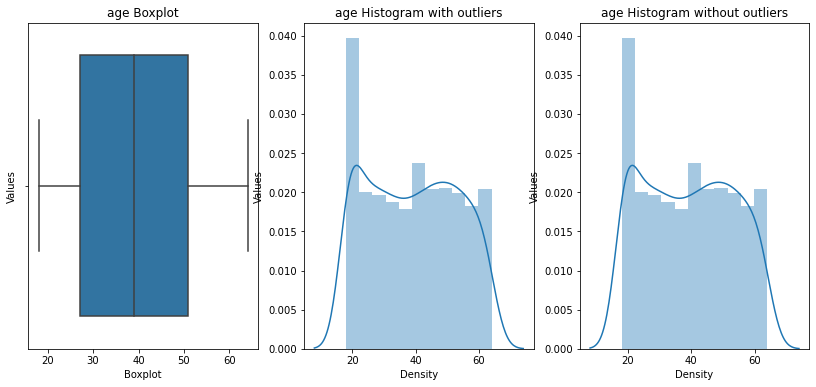

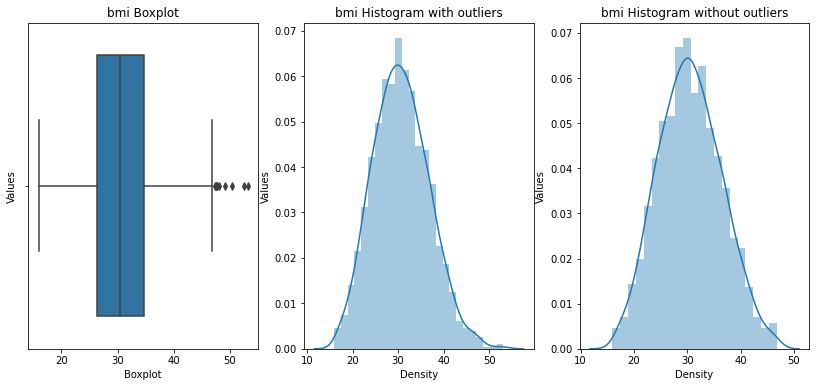

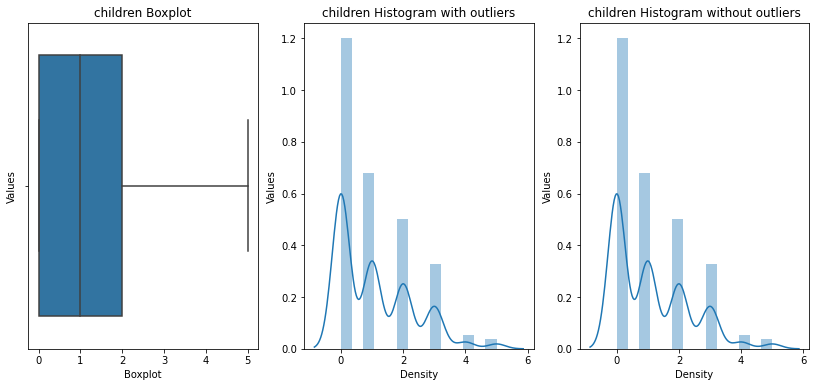

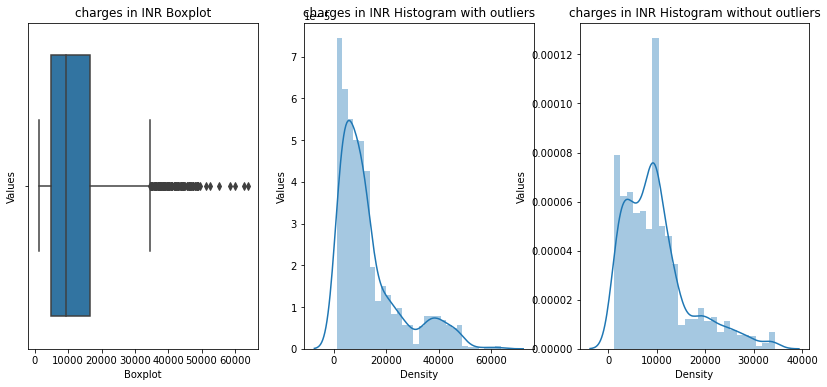

In [14]:
for col in df_eda.columns:
    odt_plot(df_eda,col)

## Outlier treatment 

In [15]:
outlier_treatment(df_eda,col,method="quartile",strategy = "lower_or_upper_whisker")

the column charges in INR has outliers
the outlier percentage is 0.06
outliers of column are : 


,age,bmi,children,charges in INR
9,60.0,25.840,0.0,28923.13692
11,62.0,26.290,0.0,27808.72510
52,48.0,28.000,1.0,23568.27200
57,18.0,31.680,2.0,34303.16720
62,64.0,24.700,1.0,30166.61817
...,...,...,...,...
1267,24.0,31.065,0.0,34254.05335
1281,47.0,27.645,2.0,24535.69855
1308,25.0,30.200,0.0,33900.65300
1321,62.0,26.695,0.0,28101.33305


,age,bmi,children,charges in INR
0,19.0,27.900,0.0,16884.92400
1,18.0,33.770,1.0,1725.55230
2,28.0,33.000,3.0,4449.46200
3,33.0,22.705,0.0,21984.47061
4,32.0,28.880,0.0,3866.85520
...,...,...,...,...
1333,50.0,30.970,3.0,10600.54830
1334,18.0,31.920,0.0,2205.98080
1335,18.0,36.850,0.0,1629.83350
1336,21.0,25.800,0.0,2007.94500


In [16]:
df_eda 

,age,bmi,children,charges in INR
0,19.0,27.900,0.0,16884.92400
1,18.0,33.770,1.0,1725.55230
2,28.0,33.000,3.0,4449.46200
3,33.0,22.705,0.0,21984.47061
4,32.0,28.880,0.0,3866.85520
...,...,...,...,...
1333,50.0,30.970,3.0,10600.54830
1334,18.0,31.920,0.0,2205.98080
1335,18.0,36.850,0.0,1629.83350
1336,21.0,25.800,0.0,2007.94500


## Replacing treated features with non-treated features in Dataframe 

In [17]:
#df["age"] = df_eda["age"]
#df["bmi"] = df_eda["bmi"]
#df["children"] = df_eda["children"]

#df["charges in INR"] = df_eda["charges in INR"] 

In [18]:
df 

,Policy no.,age,sex,bmi,charges in INR,children,smoker,region
0,PLC156898,19.0,0,27.900,16884.92400,0.0,1,3
1,PLC156907,18.0,1,33.770,1725.55230,1.0,0,2
2,PLC156916,28.0,1,33.000,4449.46200,3.0,0,2
3,PLC156925,33.0,1,22.705,21984.47061,0.0,0,1
4,PLC156934,32.0,1,28.880,3866.85520,0.0,0,1
...,...,...,...,...,...,...,...,...
1333,PLC168895,50.0,1,30.970,10600.54830,3.0,0,1
1334,PLC168904,18.0,0,31.920,2205.98080,0.0,0,0
1335,PLC168913,18.0,0,36.850,1629.83350,0.0,0,2
1336,PLC168922,21.0,0,25.800,2007.94500,0.0,0,3


In [19]:
df = df.drop("Policy no.",axis=1) 
df.head() 

,age,sex,bmi,charges in INR,children,smoker,region
0,19.0,0,27.900,16884.92400,0.0,1,3
1,18.0,1,33.770,1725.55230,1.0,0,2
2,28.0,1,33.000,4449.46200,3.0,0,2
3,33.0,1,22.705,21984.47061,0.0,0,1
4,32.0,1,28.880,3866.85520,0.0,0,1


## multivariate analysis

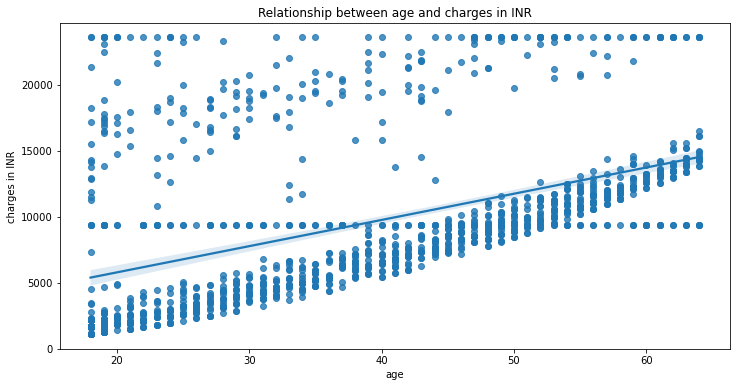

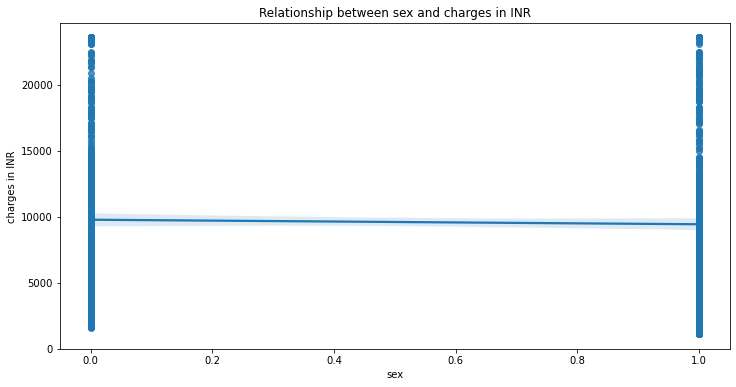

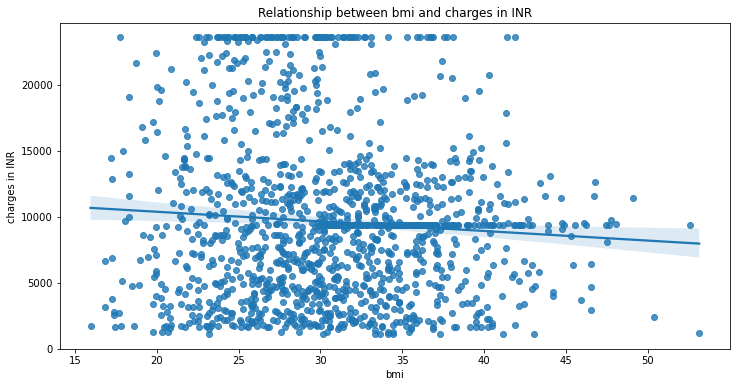

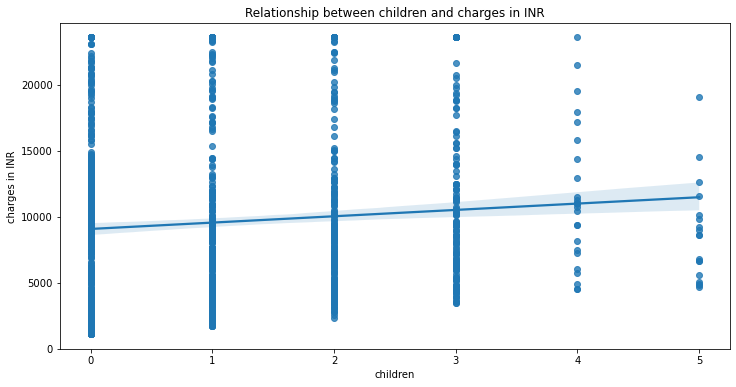

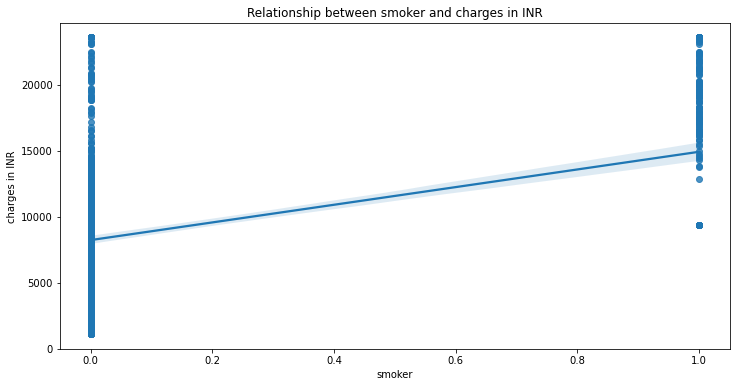

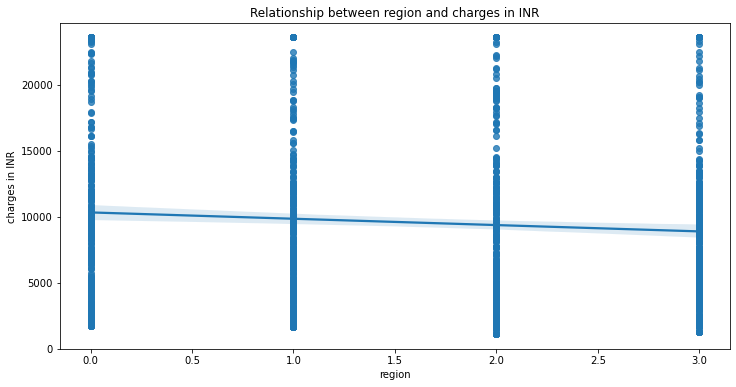

In [20]:
for col in df.columns:
    if col != "charges in INR":
        f,ax = plt.subplots(figsize = (12,6))
        sns.regplot(x=df[col],y=df_eda["charges in INR"],ax=ax).set_title(f"Relationship between {col} and charges in INR") 

## conclusions drawn from multi-variate analysis 

In [21]:
def correlation_target(df,t_col):
    ind_var = df.drop(t_col,axis=1).columns 
    corr_result = []
    for col in ind_var:
        corr_result.append(df[t_col].corr(df[col]))
        
    result_df = pd.DataFrame([ind_var,corr_result],index=["variable","correaltion"]).T
    return result_df.sort_values("correaltion",ascending=False)

In [22]:
correlation_target(df,"charges in INR") 

,variable,correaltion
4,smoker,0.787251
0,age,0.299008
2,bmi,0.198341
3,children,0.067998
1,sex,0.057292
5,region,-0.006208


## multi-covariate analysis relationship % 
* Age and charges has positive correlation of 45%
* Smoker and charges has positive correlation of 44%
* No. of children and charges has slight positive correlation of 9%
* sex and charges has slight positive correltion of 5% only
* bmi and charges has slight negative correltion of 6% only 
* region and charges has slight negative correltion of 8% only 

* so we can say that age and smoking type is affecting our charges most.


## 1. Gender of a person doesn't affect much for extendeing policies to the companies as charges and sex has only 5% correlation with each other.


## checking for multicollinearity

<AxesSubplot:>

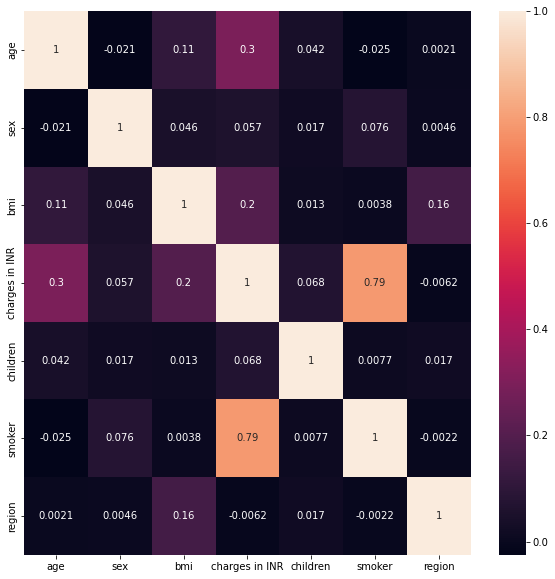

In [23]:
cor = df.corr()
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(cor,annot=True) 

### No multicollinearity is present in independant variables we can see that from above graph 

In [24]:
def vif(ind_var):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    result_df = pd.DataFrame() 
    result_df["Feature"] = ind_var.columns
    result_df["vif"] = [variance_inflation_factor(ind_var.values,i)for i in range(ind_var.shape[1])]
    return result_df

In [25]:
vif(df.drop(["charges in INR"],axis=1))

,Feature,vif
0,age,7.551348
1,sex,2.001061
2,bmi,10.371829
3,children,1.801245
4,smoker,1.256837
5,region,2.924528


In [26]:
def apply_pca(x):
    
    col = []
    n_comp = len(x.columns)
    
    
    scaler = StandardScaler().fit_transform(x)
    
    for i in range(1, n_comp):
        
        pca = PCA(n_components=i)
        p_component = pca.fit_transform(scaler)
        
        evr = np.cumsum(pca.explained_variance_ratio_)
        
        if evr[i-1]>0.9:
            
            z = i
            break
            
    print("Explained Variance Ratio", evr)
    
    for j in range(1, z+1):
        
        col.append("PC_"+str(j))
        
    result = pd.DataFrame(p_component, columns=col)
    
    return result 

In [27]:
x = df.drop(["charges in INR"],axis=1) 

## Principle component analysis 

In [82]:
sc = StandardScaler() 
x = sc.fit_transform(X_new)
pca = PCA(n_components=6)
p_componentss = pca.fit_transform(x) 
p_componentss 

array([[-1.8277924 ,  0.73977143,  0.0325539 , -0.98822171,  2.30057023,
        -0.74793581],
       [-1.64502948,  1.04751547, -0.11944082, -0.0690024 , -1.00984289,
         0.04181474],
       [-1.08129143,  1.11323853,  0.1984568 ,  1.54743161, -0.92272967,
        -0.00920351],
       ...,
       [-1.56462225,  0.5998142 , -1.55878598, -0.73294396,  0.28208679,
         0.7873672 ],
       [-1.6982766 ,  0.01968129, -1.54394156, -0.55240661,  0.59167204,
        -1.12175198],
       [ 1.61126427, -0.75494452,  0.8903542 , -1.15666377,  1.98504095,
         0.16792792]])

In [83]:
pca.explained_variance_ratio_ 

array([0.27191229, 0.16551302, 0.15261673, 0.14195164, 0.13208956,
       0.11766792])

In [84]:
xx_new = pd.DataFrame(p_componentss,columns=["pc1","pc2","pc3","pc4","pc5","pc6"]) 

In [85]:
xx_new 

,pc1,pc2,pc3,pc4,pc5,pc6
0,-1.827792,0.739771,0.032554,-0.988222,2.300570,-0.747936
1,-1.645029,1.047515,-0.119441,-0.069002,-1.009843,0.041815
2,-1.081291,1.113239,0.198457,1.547432,-0.922730,-0.009204
3,-1.290856,-0.886295,0.449327,-0.717825,-1.082744,-0.815908
4,-1.165899,-0.238912,0.263610,-0.819159,-1.154645,-0.078443
...,...,...,...,...,...,...
1333,1.307884,-0.001449,0.761077,1.463598,-1.040571,0.053177
1334,-1.764004,-1.083974,-0.770009,-0.652904,-0.020823,1.368657
1335,-1.564622,0.599814,-1.558786,-0.732944,0.282087,0.787367
1336,-1.698277,0.019681,-1.543942,-0.552407,0.591672,-1.121752


## 6. It is needed for the company to understand whether the person covered is a smoker or a non-smoker because smoking habit is affecting charges most and there are 79 % chances of increase in charges as person is a smoker.

## Model Building 

In [33]:
X = df.drop("charges in INR",axis=1)
#X = df.drop(["charges in INR","sex","region"],axis=1)
#sc = StandardScaler() 
#X = sc.fit_transform(X)
y = df[["charges in INR"]]
y["charges"] = y["charges in INR"]
y.drop("charges in INR",axis=1,inplace=True)  
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [34]:
def train_and_test_split(x,y,test_size=0.2):
    return train_test_split(x,y,test_size=test_size,random_state=40)

In [35]:
def build_model(model_name,estimator,x,y):
    x_train,x_test,y_train,y_test = train_and_test_split(x,y) 
    estimator.fit(x_train,y_train)
    y_pred = estimator.predict(x_test) 
    r2score = r2_score(y_test,y_pred)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    temp = [model_name,r2score,rmse] 
    
    return temp 

In [36]:
def build_multiple_model(x,y):
    result_df = pd.DataFrame(columns=["Model_Name","R2_Score","RMSE"])
    
    result_df.loc[len(result_df)] = build_model("Linear_Regression",LinearRegression(),x,y)
    result_df.loc[len(result_df)] = build_model("Lasso_Reression",Lasso(),x,y)
    result_df.loc[len(result_df)] = build_model("Ridge_Regression",Ridge(),x,y) 
    result_df.loc[len(result_df)] = build_model("KNN_Regression",KNeighborsRegressor(),x,y) 
    result_df.loc[len(result_df)] = build_model("Decision_Tree_Regression",DecisionTreeRegressor(),x,y) 
    result_df.loc[len(result_df)] = build_model("Random_Forest_Regression",RandomForestRegressor(),x,y) 
    result_df.loc[len(result_df)] = build_model("Adaboost_Regression",AdaBoostRegressor(),x,y) 
    result_df.loc[len(result_df)] = build_model("GBoost_Regression",GradientBoostingRegressor(),x,y) 
    result_df.loc[len(result_df)] = build_model("XGB_Regression",XGBRegressor(),x,y) 
    result_df.loc[len(result_df)] = build_model("Support_Vector_Regression",SVR(),x,y) 
    
    return result_df.sort_values("R2_Score",ascending=False)  

In [37]:
build_multiple_model(X,y)

,Model_Name,R2_Score,RMSE
7,GBoost_Regression,0.854289,4667.225579
5,Random_Forest_Regression,0.847199,4779.429594
8,XGB_Regression,0.815468,5252.295526
6,Adaboost_Regression,0.814376,5267.812758
4,Decision_Tree_Regression,0.756642,6031.647589
0,Linear_Regression,0.734046,6305.444029
1,Lasso_Reression,0.734042,6305.501635
2,Ridge_Regression,0.733933,6306.789227
3,KNN_Regression,0.099165,11604.739127
9,Support_Vector_Regression,-0.089624,12762.947813


## Hyper Parameter Tunning 

In [38]:
def hyperparameter_tunning(x,y,fold=10):
    param_ls = {"alpha": [1e-15, 1e-13,1e-11,1e-9,1e-7,1e-5, 1e-3,0.001,0.01,0.1,1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100,200,300,400,500]}
    param_rd = {"alpha": [1e-15, 1e-13,1e-11,1e-9,1e-7,1e-5, 1e-3,0.001,0.01,0.1,1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100,200,300,400,500]}
    param_knn = {"n_neighbors":[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
    param_adb = {"n_estimators" : [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100,200,300,400,500],
         "learning_rate" : [0.00001,0.0001,0.001,0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]}
    param_gb = {"alpha": [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],"learning_rate" : [0.001,0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
    param_xgb = {'learning_rate' : [0.001,0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
         'reg_lambda' : [1,2,3,4,5,6,7,8,9,10],
         'max_depth': [1,2,3,4,5,6,7,8,9,10]}
    param_rf = {"n_estimators":[10,20,30,40,50,60,70,80,90,110,130,150,170,190],'min_impurity_decrease':[0.0,0.5,1],
               "bootstrap":[True,False]}

                
    tunned_lasso=GridSearchCV(Lasso(),param_ls,cv=fold)
    tunned_ridge=GridSearchCV(Ridge(),param_rd,cv=fold)
    tunned_knn=GridSearchCV(KNeighborsRegressor(),param_knn,cv=fold)       
    tunned_adb=GridSearchCV(AdaBoostRegressor(),param_adb,cv=fold)
    tunned_gb=GridSearchCV(GradientBoostingRegressor(),param_gb,cv=fold) 
    tunned_xgb=GridSearchCV(XGBRegressor(),param_xgb,cv=fold)
    tunned_rf=GridSearchCV(RandomForestRegressor(),param_rf,cv=fold)
                
                
    tunned_lasso.fit(x,y)
    tunned_ridge.fit(x,y)
    tunned_knn.fit(x,y)
    tunned_adb.fit(x,y)
    tunned_gb.fit(x,y)
    tunned_xgb.fit(x,y)
    tunned_rf.fit(x,y)
                
    
    tunned = [tunned_lasso,tunned_ridge,tunned_knn,tunned_adb,tunned_gb,tunned_xgb,tunned_rf]
    models = ["Lasso","Ridge","KNeighborRegressor","AdaBoostRegressor","GradientBoostingRegressor","XGBRegressor","RandomForestRegressor"]
                
    for i in range (0,len(tunned)):
        print("model",models[i])
        print("best_parameters",tunned[i].best_params_)

In [39]:
#hyperparameter_tunning(X,y,fold=10)

In [40]:
def k_fold_cv_tunned(x,y,fold=10):
    
    score_lr = cross_val_score(LinearRegression(),x,y,cv=fold)
    score_la = cross_val_score(Lasso(alpha = 60),x,y,cv=fold)
    score_rd = cross_val_score(Ridge(alpha= 1),x,y,cv=fold)
    score_dtr = cross_val_score(DecisionTreeRegressor(),x,y,cv=fold)
    score_knn = cross_val_score(KNeighborsRegressor(n_neighbors= 13),x,y,cv=fold)
    score_rf = cross_val_score(RandomForestRegressor(bootstrap= True, min_impurity_decrease= 1, n_estimators= 150),x,y,cv=fold)
    score_ad = cross_val_score(AdaBoostRegressor(learning_rate= 0.001, n_estimators= 20),x,y,cv=fold)
    score_g = cross_val_score(GradientBoostingRegressor(alpha= 0.6, learning_rate= 0.1),x,y,cv=fold)
    score_xgb = cross_val_score(XGBRegressor(learning_rate= 0.1, max_depth= 2, reg_lambda= 3),x,y,cv=fold)
    score_svr = cross_val_score(SVR(),x,y,cv=fold)
    
    score = [score_lr,score_la,score_rd,score_dtr,score_knn,score_rf,score_ad,score_g,score_xgb,score_svr]
    models = ["Linear Regression","Lasso Regression","Ridge Regression","Decision Tree Regression","KNN Regression","Random forest Regression","Adaboost Regression","GBoost Regression","XGBoost Regression","Support vector machines Regression"]
    
    result = []
    
    for i in range(0,len(models)):
        score_mean = np.mean(score[i]) 
        score_std = np.std(score[i]) 
        model_name = models[i]
        temp = [model_name,score_mean,score_std]
        result.append(temp)
        
    result_df = pd.DataFrame(result,columns=["model_name","score_mean","score_std"])
    
    return result_df.sort_values("score_mean",ascending=False)

In [41]:
k_fold_cv_tunned(X,y,fold=10)

,model_name,score_mean,score_std
8,XGBoost Regression,0.860001,0.044084
7,GBoost Regression,0.856153,0.045455
6,Adaboost Regression,0.849305,0.048613
5,Random forest Regression,0.832789,0.046191
1,Lasso Regression,0.745119,0.040579
2,Ridge Regression,0.744818,0.041491
0,Linear Regression,0.744805,0.041861
3,Decision Tree Regression,0.700240,0.048611
4,KNN Regression,0.160897,0.068411
9,Support vector machines Regression,-0.104918,0.030712


## clustering 

<AxesSubplot:xlabel='age', ylabel='charges'>

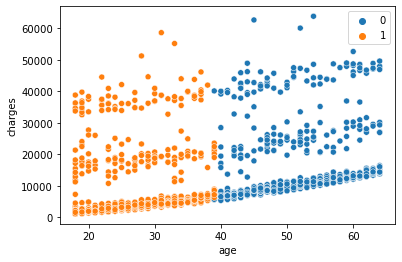

In [78]:
labels = KMeans(n_clusters=2,random_state=42).fit_predict(X) 
sns.scatterplot(x=X.age,y=y.charges,hue= labels)  

## 7. Age and charges are 30% correlated with each other as well as there are different clusters of charges are getting formed for different age groups hence we would say that age is  also affecting insurance claimed.

<AxesSubplot:xlabel='bmi', ylabel='charges'>

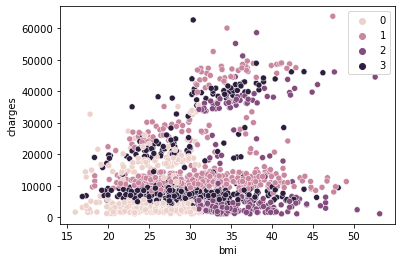

In [43]:
labels = KMeans(n_clusters=4,random_state=42).fit_predict(X) 
sns.scatterplot(x=X.bmi,y=y.charges,hue= labels) 

<AxesSubplot:xlabel='children', ylabel='charges'>

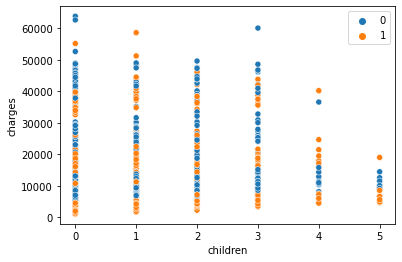

In [44]:
labels = KMeans(n_clusters=2,random_state=42).fit_predict(X) 
sns.scatterplot(x=X.children,y=y.charges,hue= labels) 

<AxesSubplot:xlabel='sex', ylabel='charges'>

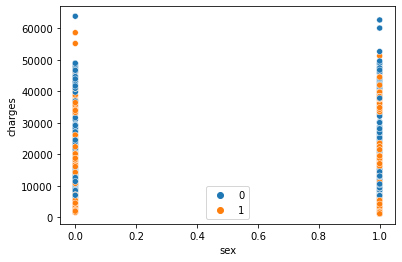

In [45]:
labels = KMeans(n_clusters=2,random_state=42).fit_predict(X) 
sns.scatterplot(x=X.sex,y=y.charges,hue= labels) 

<AxesSubplot:xlabel='smoker', ylabel='charges'>

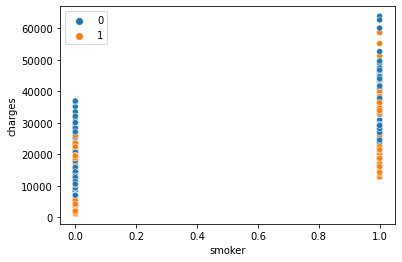

In [46]:
labels = KMeans(n_clusters=2,random_state=42).fit_predict(X) 
sns.scatterplot(x=X.smoker,y=y.charges,hue= labels) 

<AxesSubplot:xlabel='region', ylabel='charges'>

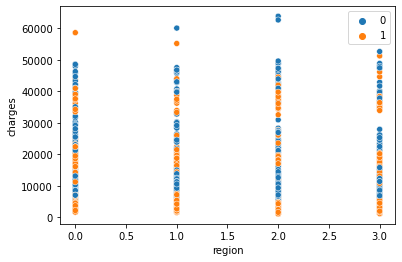

In [47]:
labels = KMeans(n_clusters=2,random_state=42).fit_predict(X) 
sns.scatterplot(x=X.region,y=y.charges,hue= labels) 

## 3. From clustering plot of region and charges of the data we can say that region is not affecting charges at all as there is no any relation between charges and region as well as other independant variables and it is not forming any clusters with charges,hence we would specifically not suggest to offer different policies based upon geographic location.

### only age is forming three different clusters with charges so lets make new datafrme of independant variables which will consist clusters of age 

In [79]:
df_labels = pd.DataFrame(labels,columns=["labels"]) 
df_labels.head()

,labels
0,1
1,1
2,1
3,1
4,1


In [80]:
X_new = X.join(df_labels,how="inner") 

In [81]:
X_new

,age,sex,bmi,children,smoker,region,labels
0,19.0,0,27.900,0.0,1,3,1
1,18.0,1,33.770,1.0,0,2,1
2,28.0,1,33.000,3.0,0,2,1
3,33.0,1,22.705,0.0,0,1,1
4,32.0,1,28.880,0.0,0,1,1
...,...,...,...,...,...,...,...
1333,50.0,1,30.970,3.0,0,1,0
1334,18.0,0,31.920,0.0,0,0,1
1335,18.0,0,36.850,0.0,0,2,1
1336,21.0,0,25.800,0.0,0,3,1


## now lets fit model on clustered data 

In [50]:
build_multiple_model(X_new,y) 

,Model_Name,R2_Score,RMSE
7,GBoost_Regression,0.854238,4668.048445
5,Random_Forest_Regression,0.846612,4788.602960
6,Adaboost_Regression,0.828094,5069.423949
8,XGB_Regression,0.814731,5262.768002
4,Decision_Tree_Regression,0.767719,5892.768250
0,Linear_Regression,0.734035,6305.577832
1,Lasso_Reression,0.734033,6305.605239
2,Ridge_Regression,0.733920,6306.946358
3,KNN_Regression,0.098960,11606.061594
9,Support_Vector_Regression,-0.089639,12763.036585


In [51]:
k_fold_cv_tunned(X_new,y,fold=10)

,model_name,score_mean,score_std
8,XGBoost Regression,0.859931,0.044074
7,GBoost Regression,0.856406,0.044615
6,Adaboost Regression,0.847189,0.045859
5,Random forest Regression,0.833338,0.045903
1,Lasso Regression,0.745119,0.040579
2,Ridge Regression,0.744311,0.041580
0,Linear Regression,0.744290,0.041952
3,Decision Tree Regression,0.698998,0.046547
4,KNN Regression,0.159479,0.067910
9,Support vector machines Regression,-0.104959,0.030698


## learning curve 

In [52]:
def genrate_learning_curve(model_name,estimator,x,Y,fold=10):
    train_size,train_score,test_score = learning_curve(estimator=estimator,X=x,y=Y,cv=fold) 
    train_score_mean = np.mean(train_score,axis=1)
    test_score_mean = np.mean(test_score,axis=1) 
    plt.plot(train_size,train_score_mean,color="blue")
    plt.plot(train_size,test_score_mean,color="orange")
    
    plt.xlabel("Samples")
    plt.ylabel("Accuracy")
    plt.title("Learning Curve" + model_name)
    plt.legend("Training accurcy","Testing accurcy") 

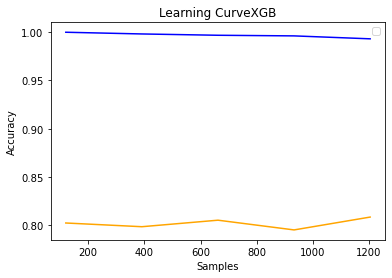

In [53]:
genrate_learning_curve("XGB",XGBRegressor(),X_new,y,fold=10) 

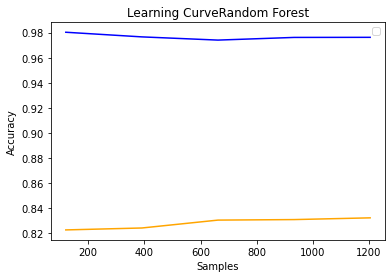

In [54]:
genrate_learning_curve("Random Forest",RandomForestRegressor(),X_new,y,fold=10) 

## Feature Importance by using XGBoost Package 

In [55]:
x_train,x_test,y_train,y_test = train_test_split(X_new,y,test_size=0.2,random_state=42) 

xgb = XGBRegressor() 
xgb.fit(x_train,y_train) 

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

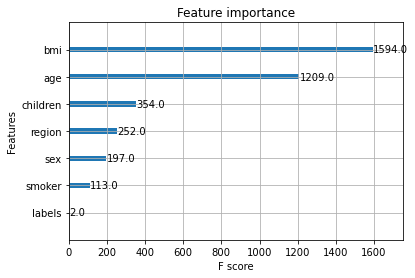

In [56]:
xgboost.plot_importance(xgb) 

## 5. from feature importance we would say that study of persons BMI gives the company an idea for the insurance claim as it is affecting charges the most and there is 20% correlation between bmi and charges also so study of bmi will play a crucial role in predicting claim of insurance 
## 8. As well as company should extend certain discounts after checking BMI of a person.

# Model Building 

In [57]:
X_neww = X_new[["bmi","age","children","region","sex","smoker"]] 
X_neww

,bmi,age,children,region,sex,smoker
0,27.900,19.0,0.0,3,0,1
1,33.770,18.0,1.0,2,1,0
2,33.000,28.0,3.0,2,1,0
3,22.705,33.0,0.0,1,1,0
4,28.880,32.0,0.0,1,1,0
...,...,...,...,...,...,...
1333,30.970,50.0,3.0,1,1,0
1334,31.920,18.0,0.0,0,0,0
1335,36.850,18.0,0.0,2,0,0
1336,25.800,21.0,0.0,3,0,0


In [58]:
build_multiple_model(X_neww,y) 

,Model_Name,R2_Score,RMSE
7,GBoost_Regression,0.854289,4667.225579
5,Random_Forest_Regression,0.847301,4777.826262
6,Adaboost_Regression,0.820694,5177.383184
8,XGB_Regression,0.814140,5271.156763
4,Decision_Tree_Regression,0.783617,5687.531805
0,Linear_Regression,0.734046,6305.444029
1,Lasso_Reression,0.734042,6305.501856
2,Ridge_Regression,0.733933,6306.789227
3,KNN_Regression,0.099165,11604.739127
9,Support_Vector_Regression,-0.089624,12762.947813


In [59]:
k_fold_cv_tunned(X_neww,y,fold=10)

,model_name,score_mean,score_std
8,XGBoost Regression,0.860001,0.044084
7,GBoost Regression,0.856219,0.045083
6,Adaboost Regression,0.846230,0.049587
5,Random forest Regression,0.834579,0.045280
1,Lasso Regression,0.745119,0.040579
2,Ridge Regression,0.744818,0.041491
0,Linear Regression,0.744805,0.041861
3,Decision Tree Regression,0.698886,0.056405
4,KNN Regression,0.160897,0.068411
9,Support vector machines Regression,-0.104918,0.030712


## 4. Tried to build a model by removing fetures which are not important much but it is affecting accuracy drastically hence i would say that number of dependants definately makes a difference in the amount claimed.

### As G-boost Regression is giving atmost accuracy we are going to build a  prediction model by using G-boost algorithm 

In [60]:
X_train,X_test,y_train,y_test = train_and_test_split(X_neww,y,test_size=0.2)

In [61]:
xxgb = XGBRegressor(learning_rate= 0.1, max_depth= 2, reg_lambda= 3)

In [62]:
xxgb.fit(X_neww,y) 

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=3, ...)

In [63]:
new_sample = [[28,20,1,2,1,1]]